In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv('train.csv')

### Domain Analysis 

battery_power : Total energy a battery can store in one time measured in mAh
blue : Has bluetooth or not
clock_speed : speed at which microprocessor executes instructions 
dual_sim :Has dual sim support or not
fc : Front Camera mega pixels
four_g : Has 4G or not
int_memory : Has 4G or not
m_dep : Mobile Depth in cm
mobile_wt : Weight of mobile phone
n_cores : Number of cores of processor
pc : Primary Camera mega pixels
px_height : Pixel Resolution Height
px_width : Pixel Resolution Width
ram : Random Access Memory in Megabytes
sc_h : Screen Height of mobile in cm
sc_w : Screen Width of mobile in cm
talk_time : longest time that a single battery charge will last when you are
three_g : has 3G or not 
touch_screen :has touch screen or not
wifi : has wifi or not


### Basic Checks 

In [83]:
df.shape

(2000, 21)

In [84]:
df.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### observation
  no categorical values

In [86]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [87]:
df.duplicated().sum()

0

#### Observation
    no null values
    no duplicate values
    no corrupted values

In [88]:
df.price_range.nunique()

4

### Exploratory Data Analysis

In [89]:
#Univariate analysis

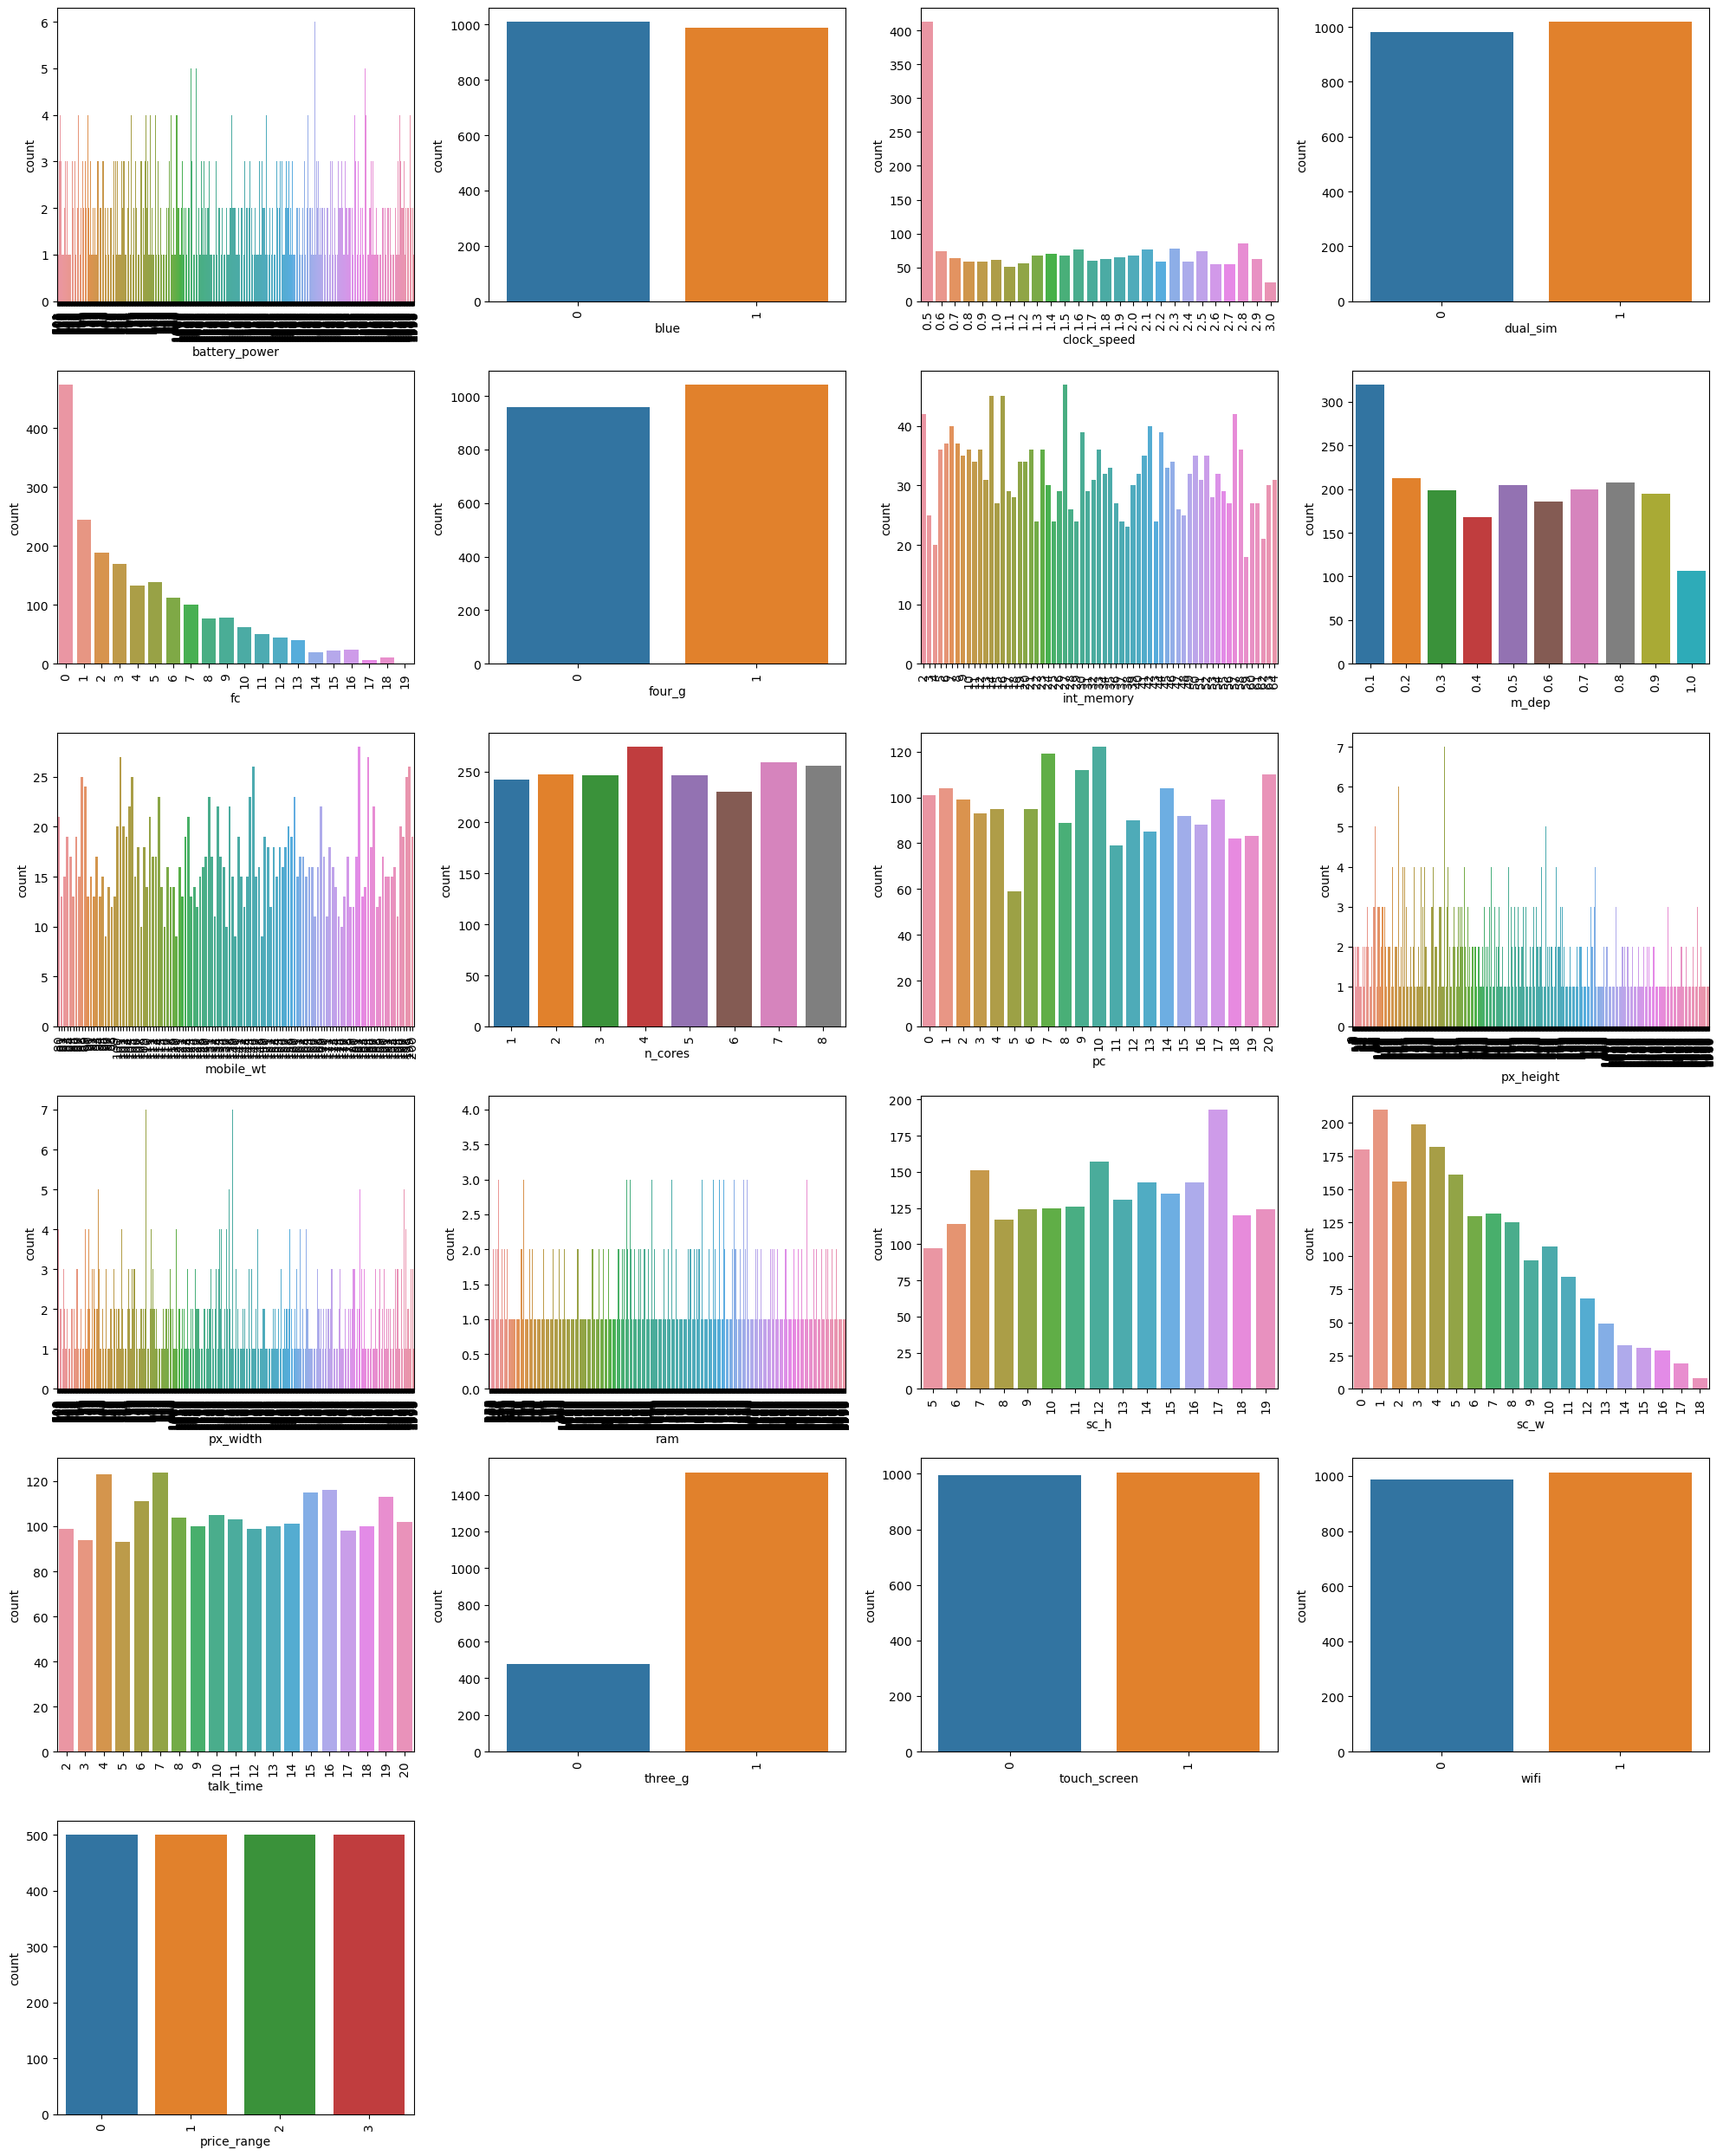

In [90]:
plotnumber =1
plt.figure(figsize=(20,25))
for column in df:
    plt.subplot(6,4,plotnumber)
    sns.countplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.xticks(rotation=90)
    plotnumber =plotnumber +1
plt.tight_layout()    

In [91]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [92]:
#bivariate analysis

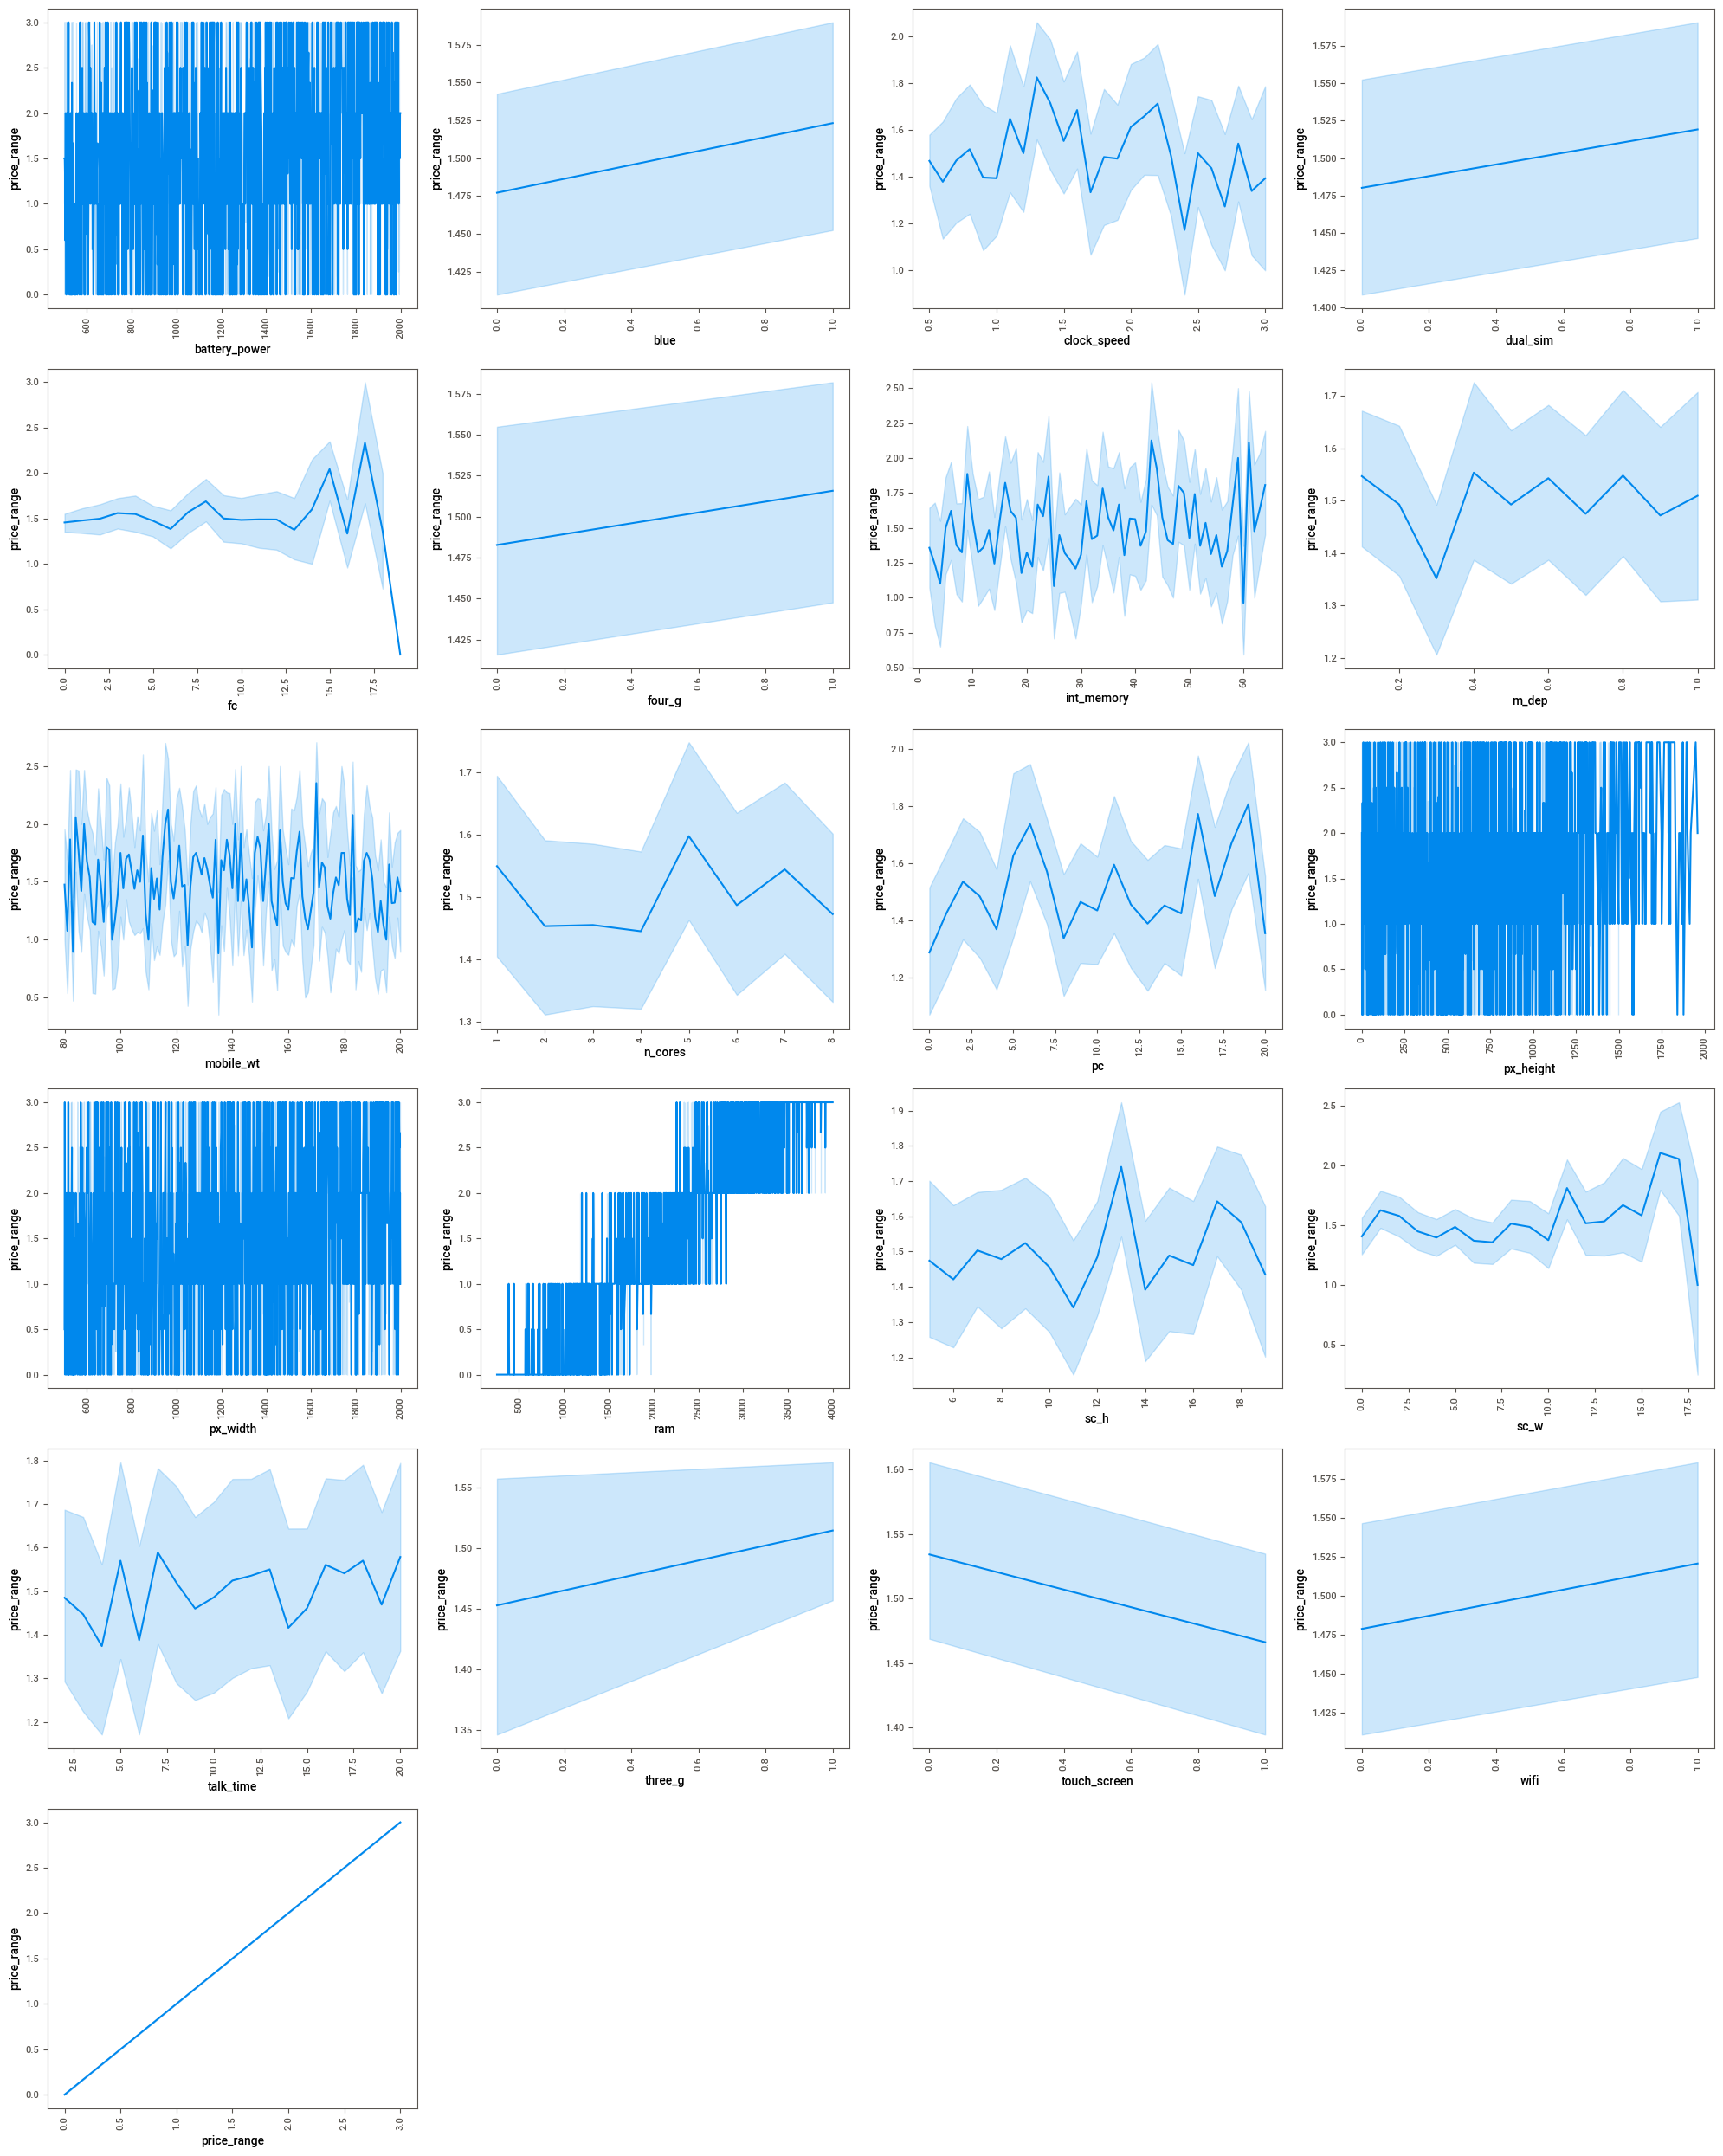

In [93]:
plotnumber =1
plt.figure(figsize=(20,25))
for column in df:
    plt.subplot(6,4,plotnumber)
    sns.lineplot(x=column,y='price_range', data=df)
    plt.xlabel(column,fontsize=10)
    plt.xticks(rotation=90)
    plotnumber =plotnumber +1
plt.tight_layout() 

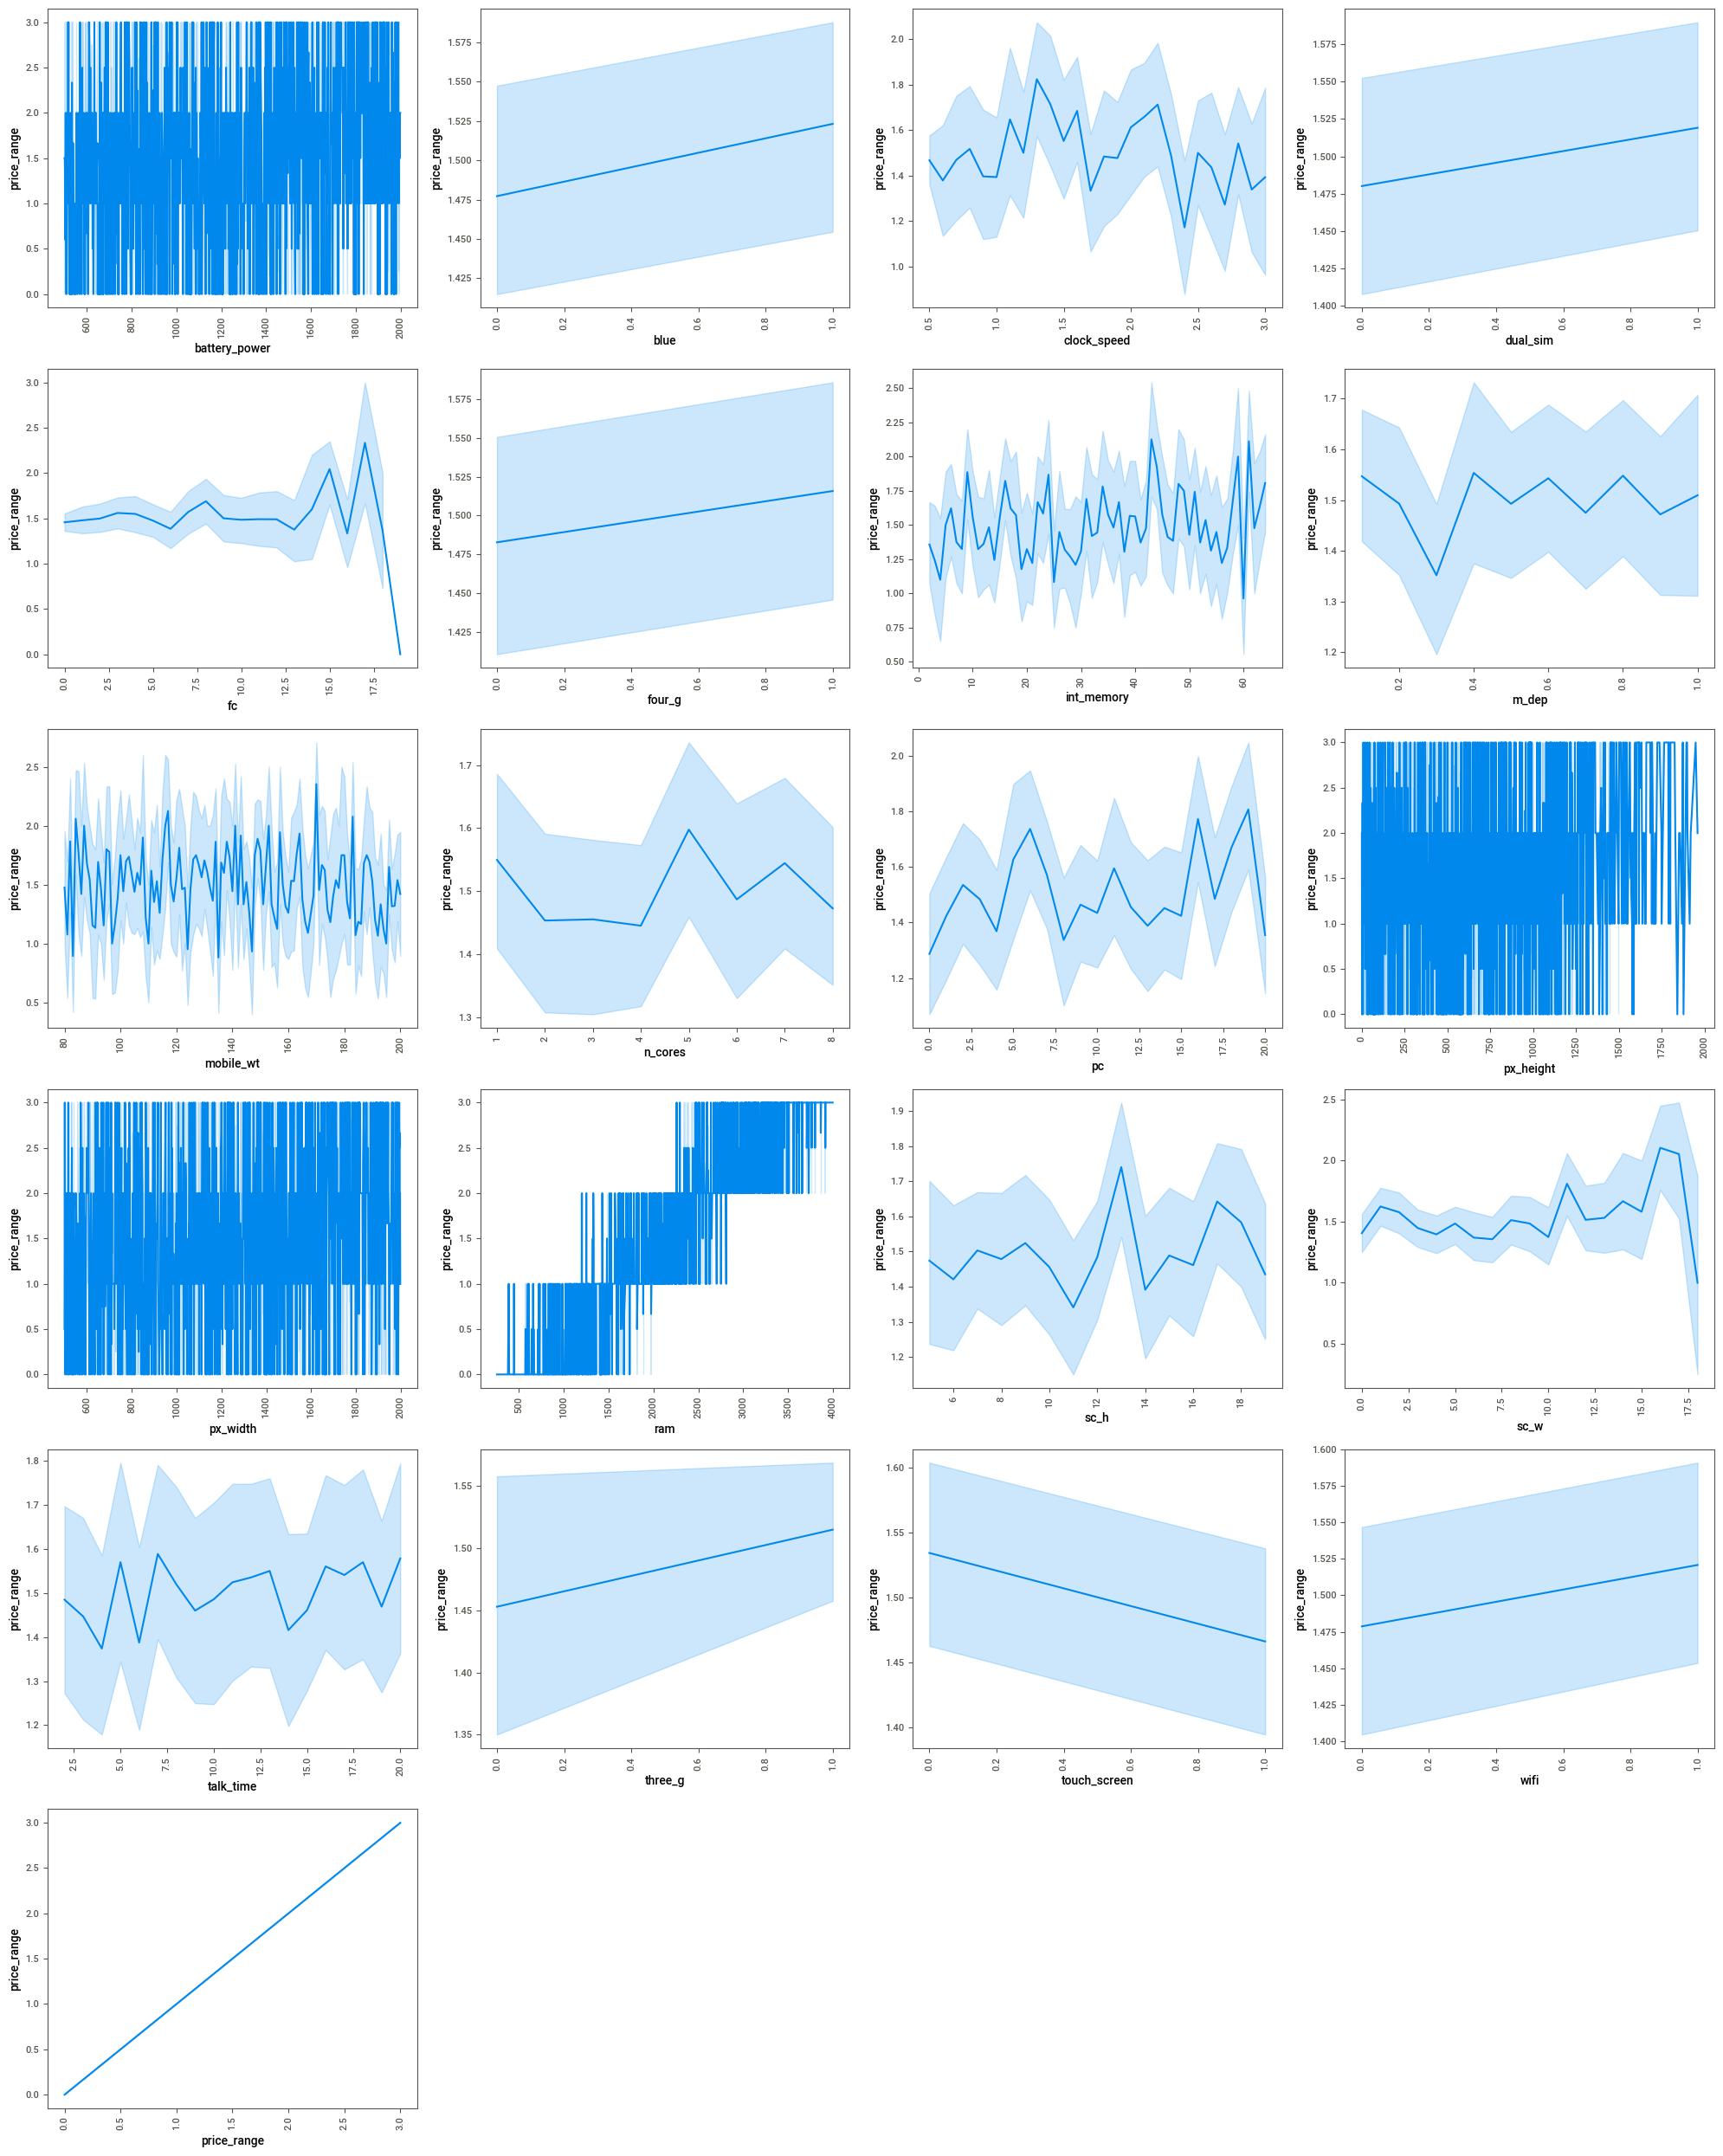

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plotnumber = 1
plt.figure(figsize=(20, 25))

# Assuming 'price_range' is the column you want to compare with other columns
for column in df.columns:
    plt.subplot(6, 4, plotnumber)
    sns.lineplot(x=df[column], y=df['price_range'])
    plt.xlabel(column, fontsize=10)
    plt.xticks(rotation=90)
    plotnumber += 1

plt.tight_layout()
plt.show()


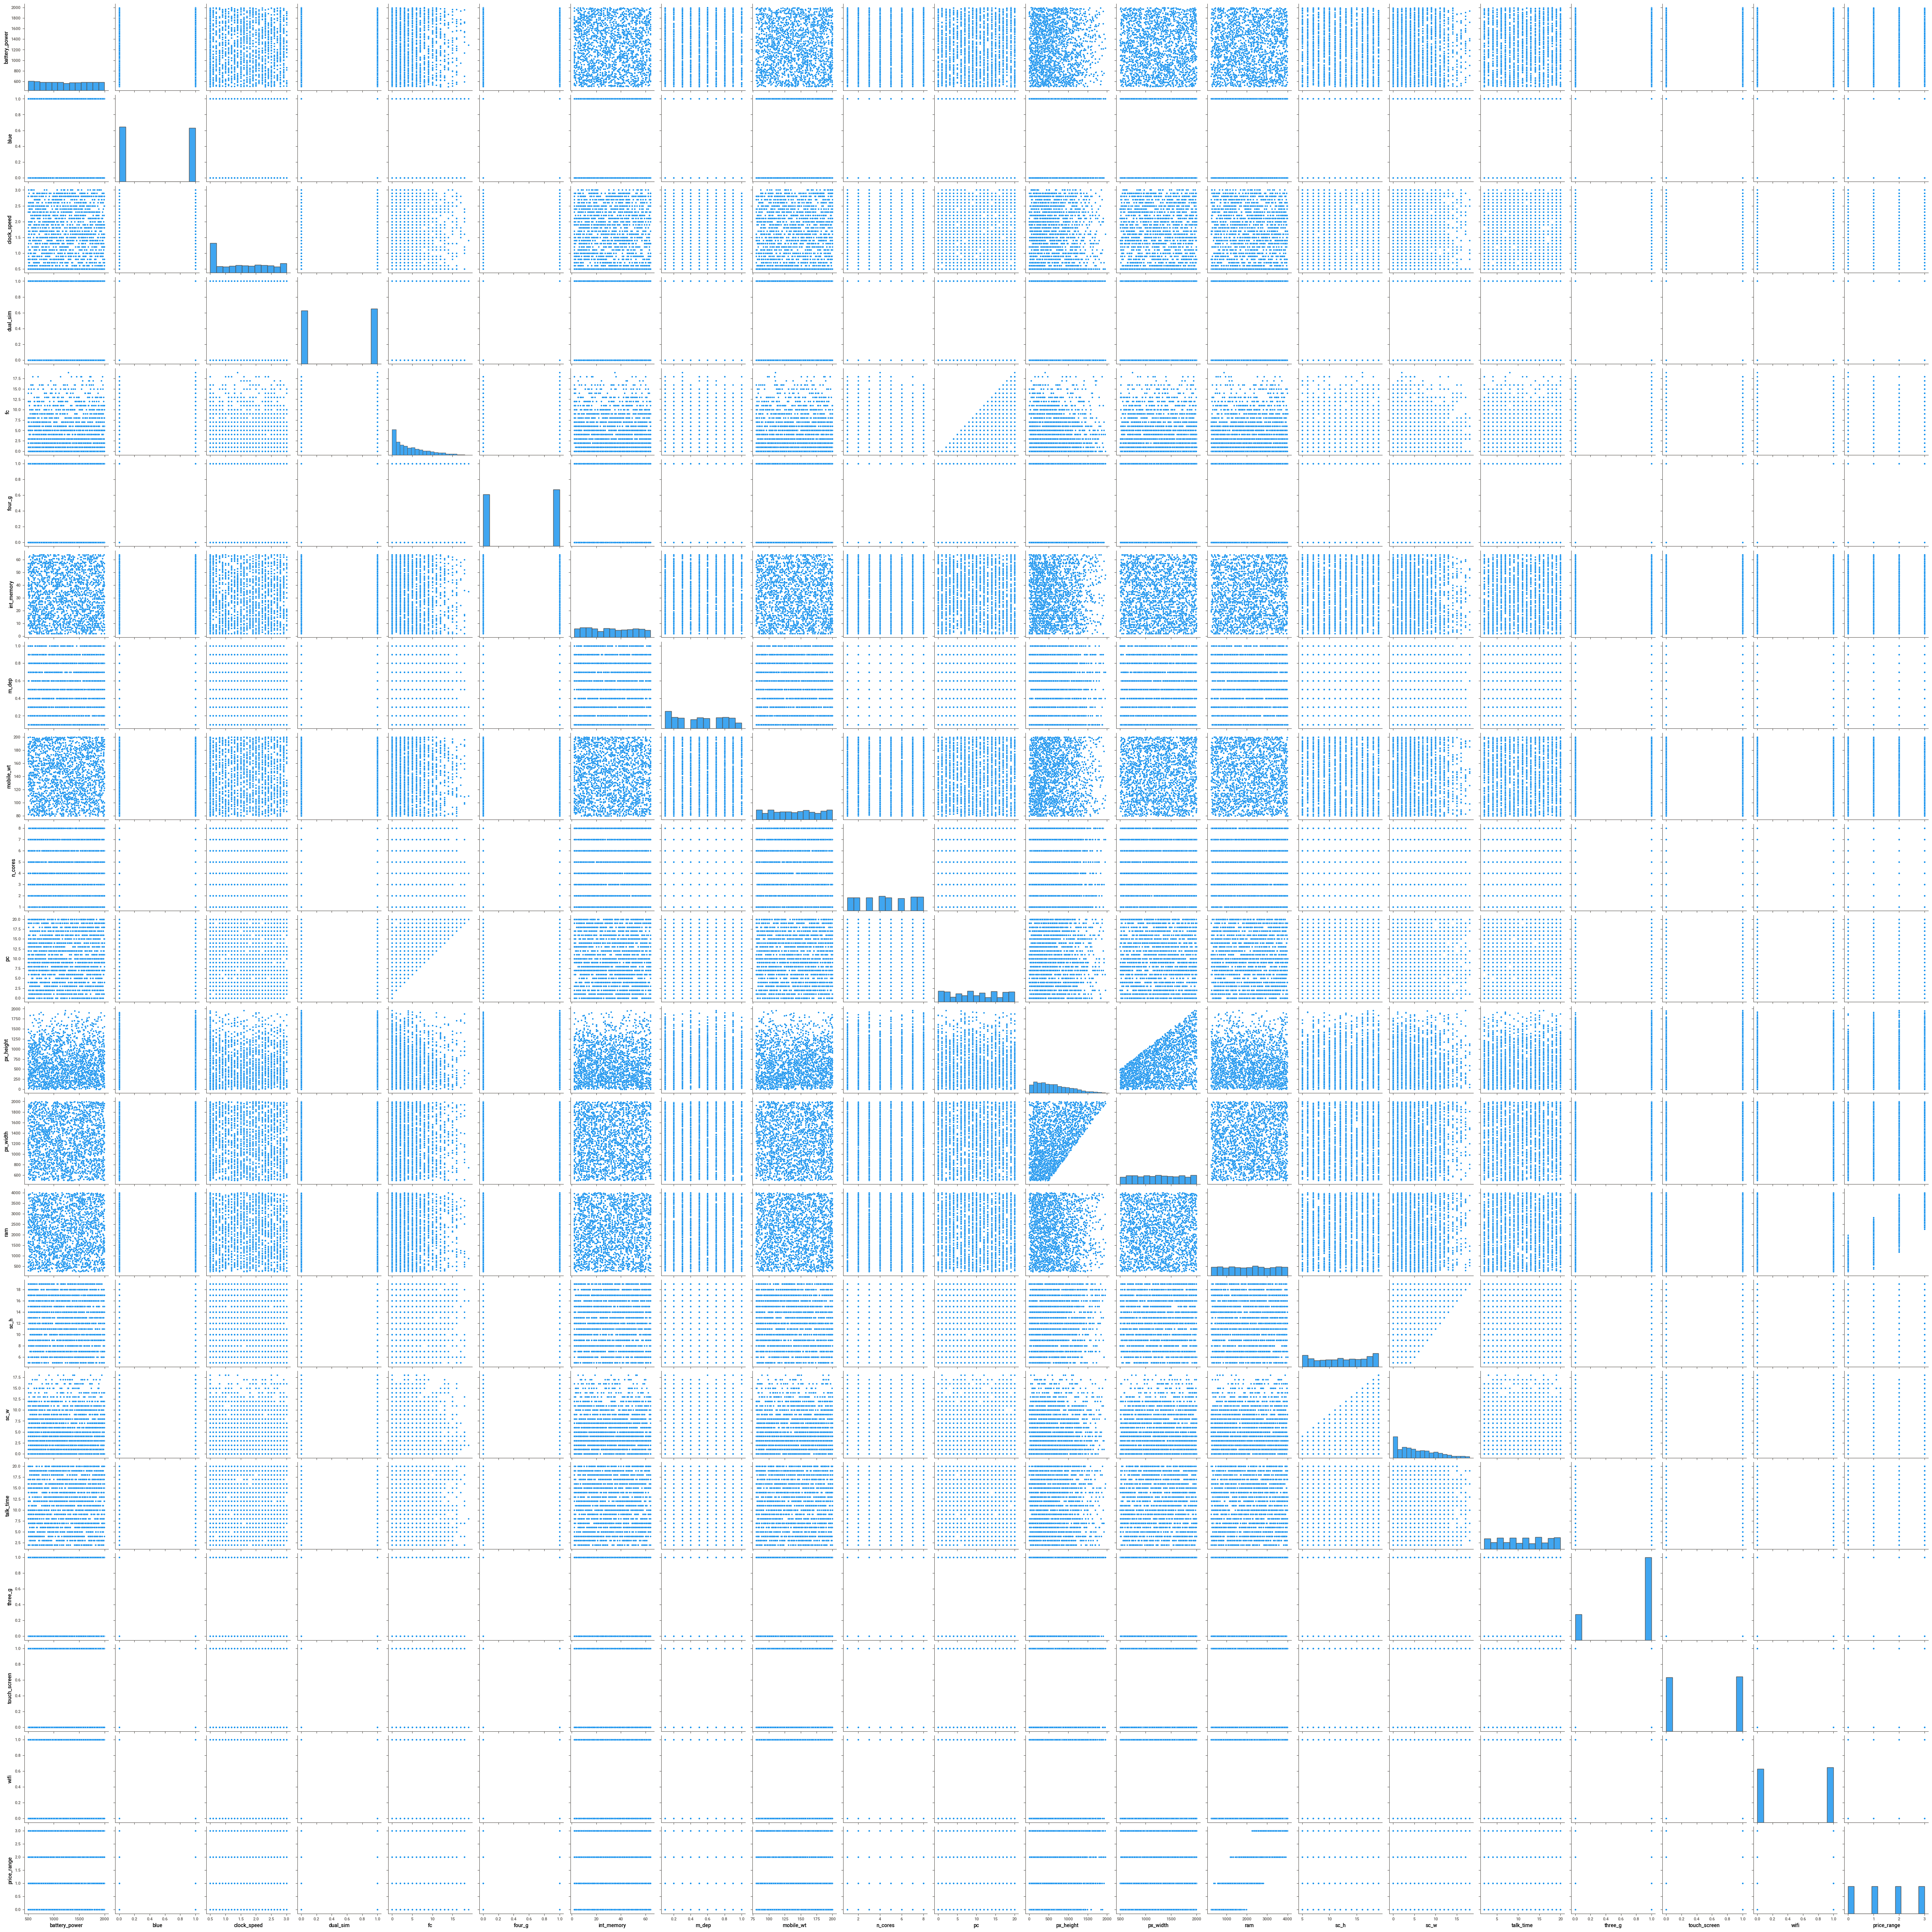

In [95]:
sns.pairplot(df)

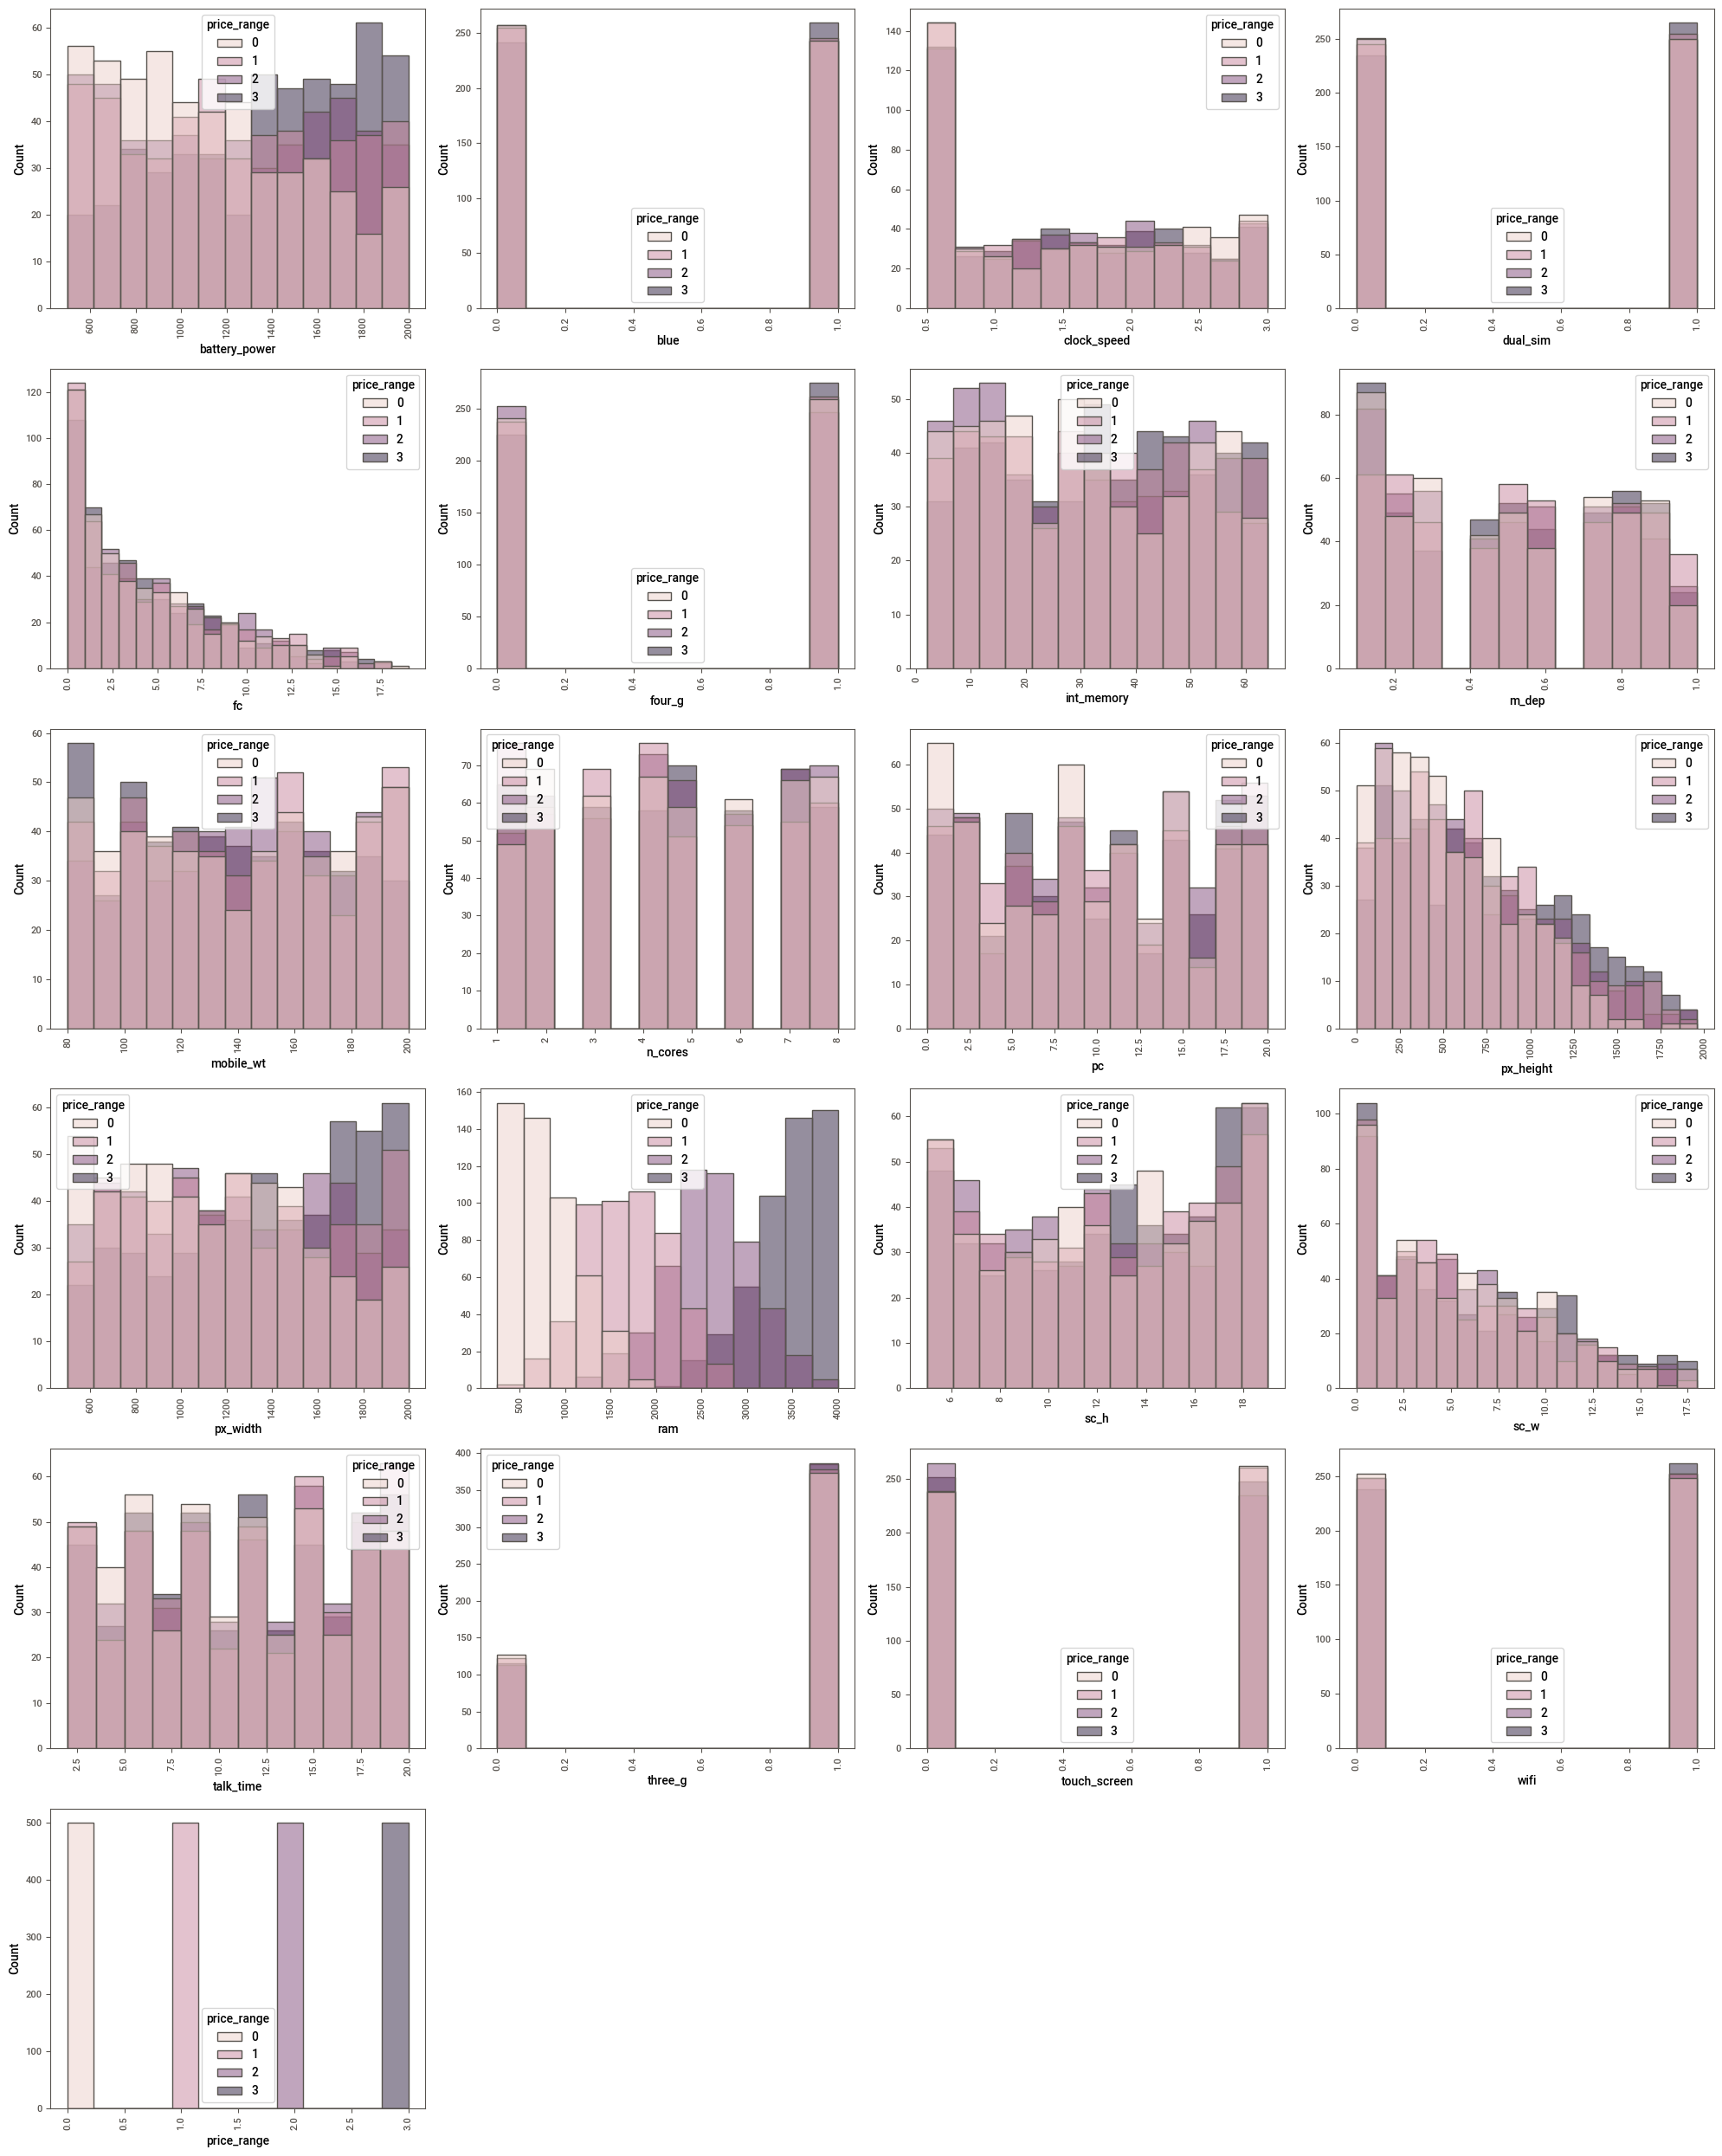

In [96]:


plotnumber = 1
plt.figure(figsize=(20, 25))
for column in df.columns:
    plt.subplot(6, 4, plotnumber)
    sns.histplot(x=df[column], hue=df['price_range'])
    plt.xlabel(column, fontsize=10)
    plt.xticks(rotation=90)
    plotnumber += 1

plt.tight_layout()
plt.show()


### Data Preprocessing 

In [97]:
#outlier detection

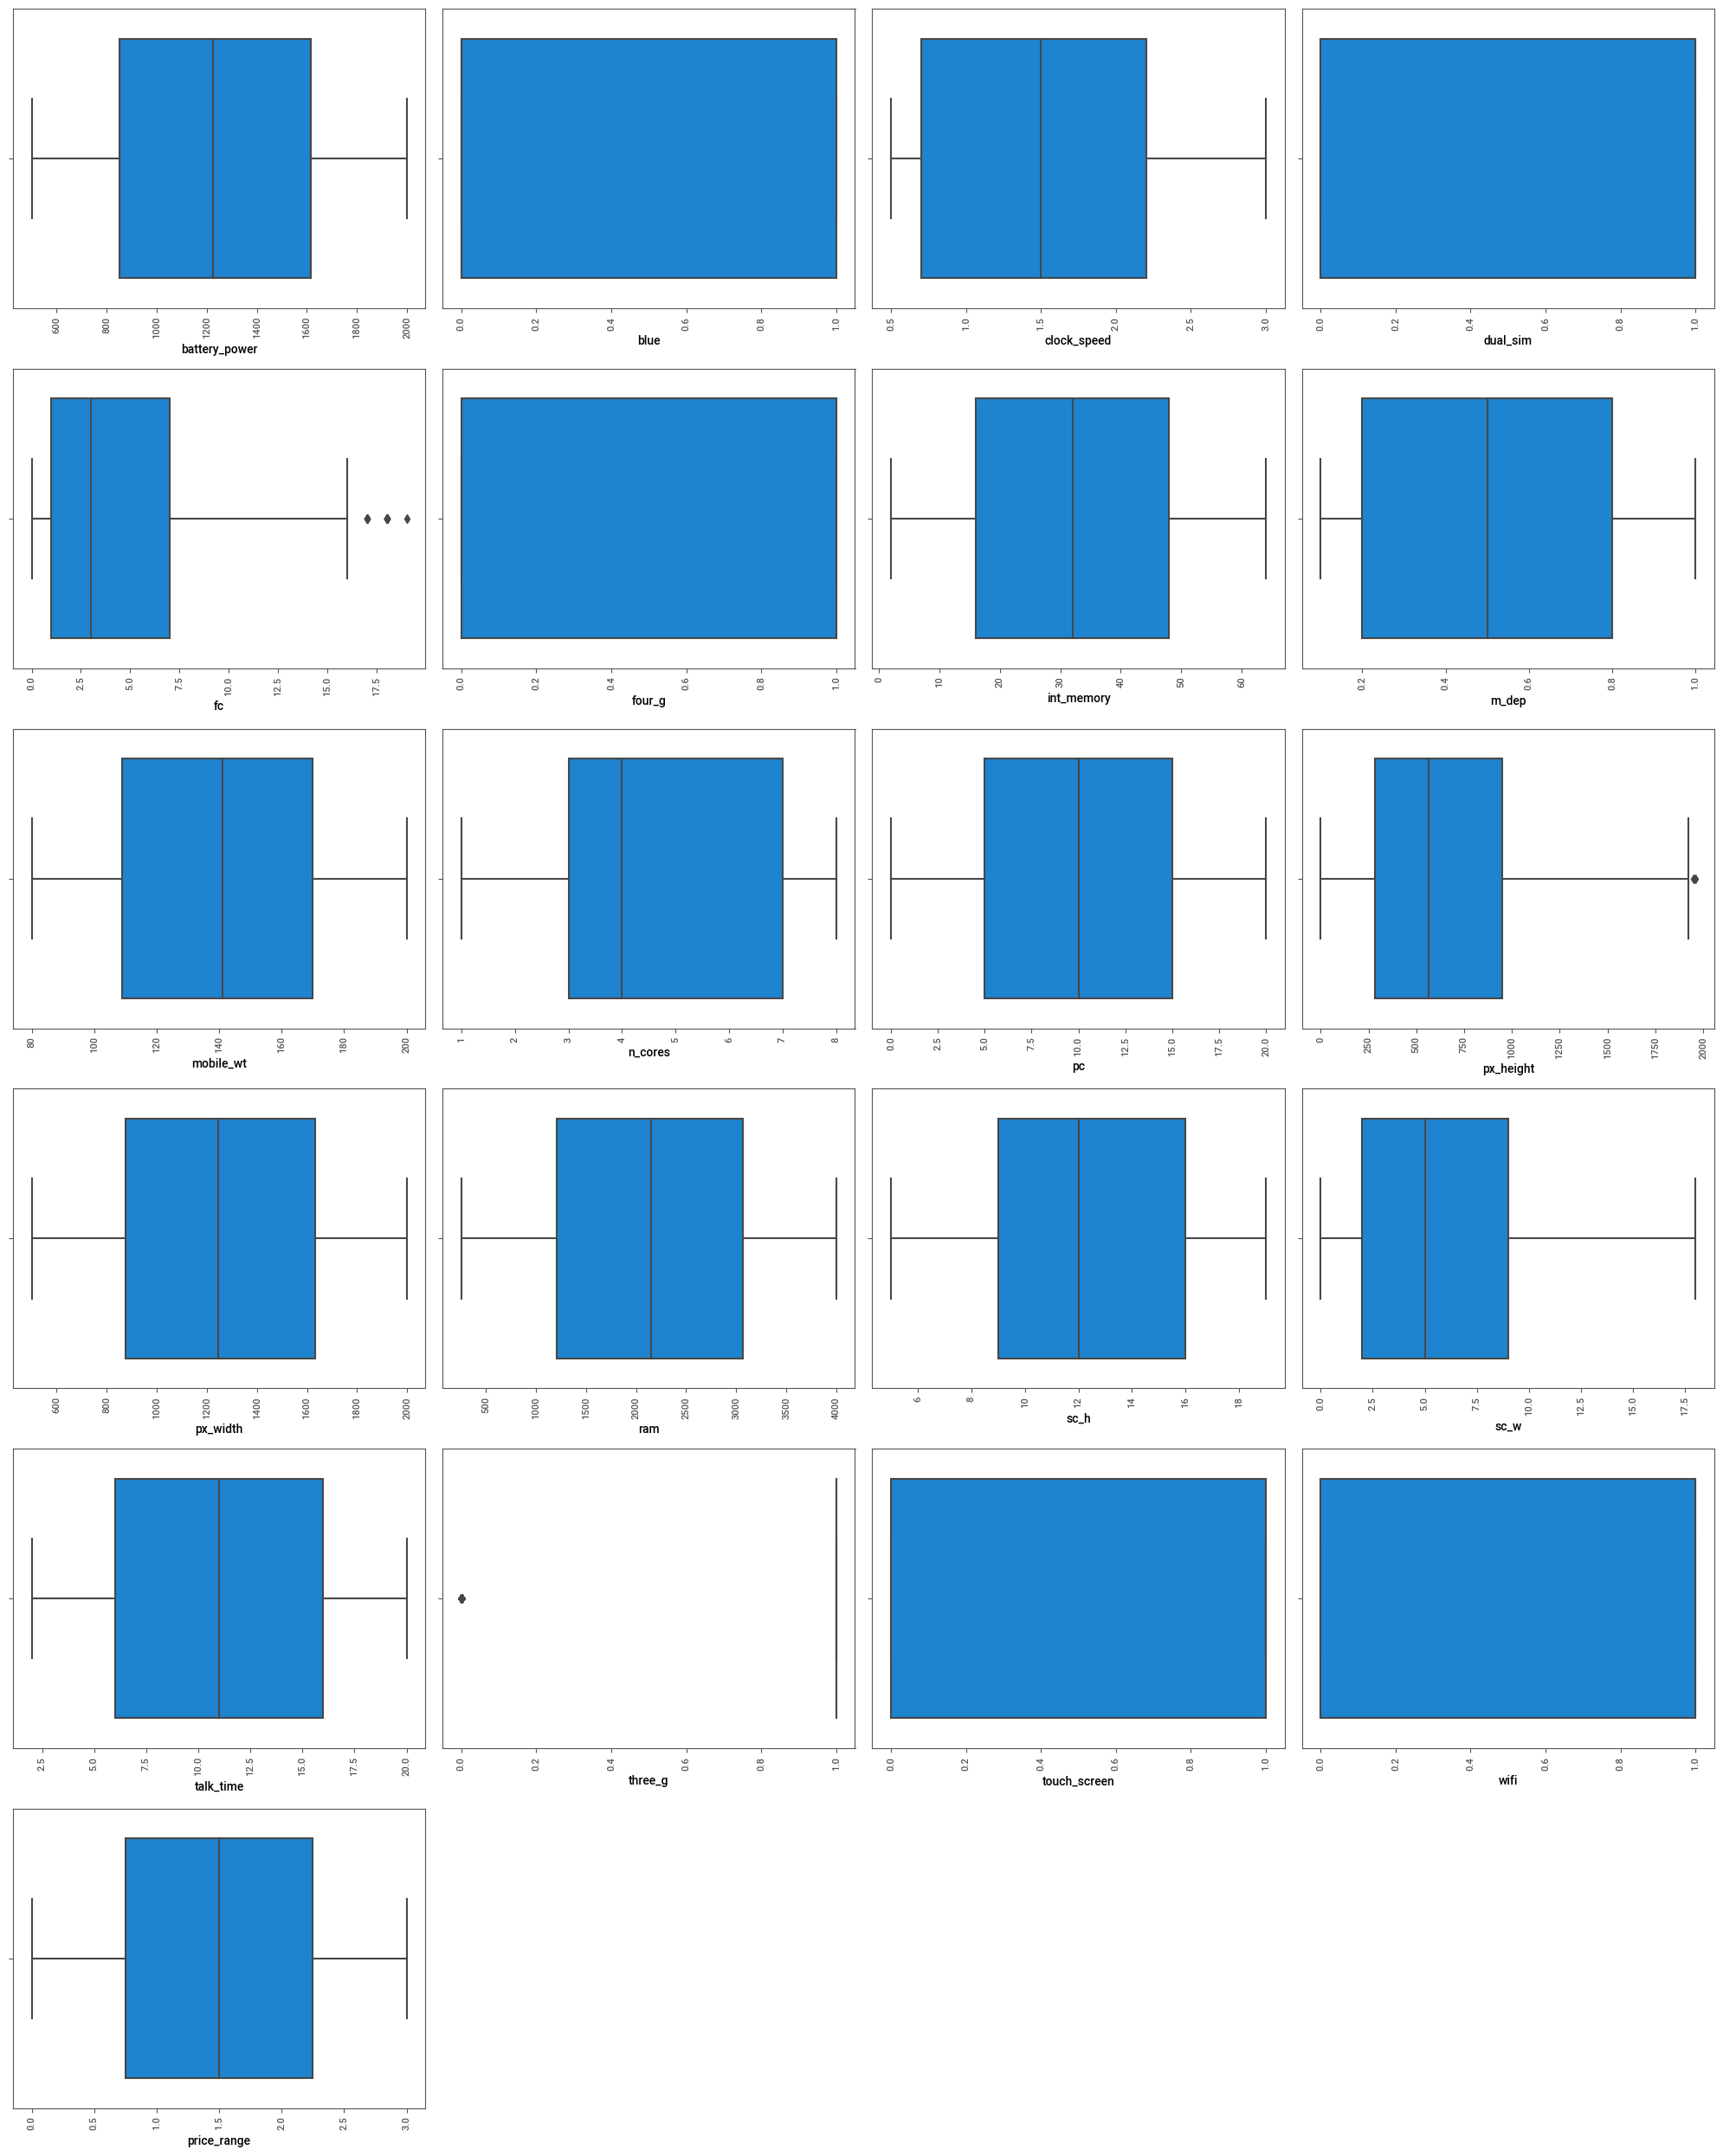

In [98]:
plotnumber = 1
plt.figure(figsize=(20, 25))
for column in df.columns:
    plt.subplot(6, 4, plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column, fontsize=10)
    plt.xticks(rotation=90)
    plotnumber += 1

plt.tight_layout()
plt.show()


#### Observations
  outliers are in px_height and fc

In [99]:
#outlier removal for fc 
from scipy import stats
iqr=stats.iqr(df.fc,interpolation='midpoint')
q1=df.fc.quantile(0.25)
q3=df.fc.quantile(0.75)

In [100]:
min_limit=q1-1.5*iqr
max_limit=q3+1.5*iqr

In [101]:
df[(df.fc>max_limit)]=np.median(df['fc'])

<Axes: xlabel='fc'>

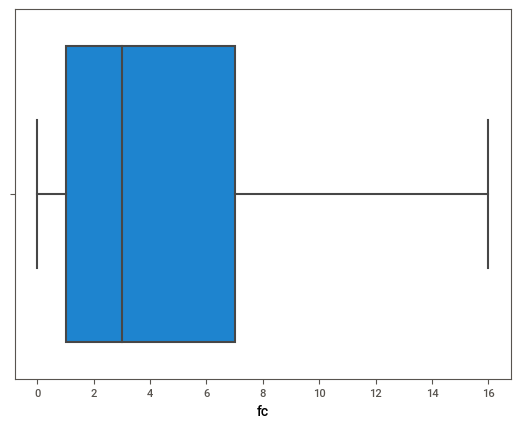

In [102]:
sns.boxplot(x='fc',data=df)

In [103]:
# outlier reoval for pixel_ht

In [104]:
#outlier removal for px_height
from scipy import stats
iqr_px=stats.iqr(df.px_height,interpolation='midpoint')
q1_px=df.px_height.quantile(0.25)
q3_px=df.px_height.quantile(0.75)

In [105]:
min_limit_px=q1_px-1.5*iqr_px
max_limit_px=q3_px+1.5*iqr_px

In [106]:
df = df.drop(df[df['px_height'] > max_limit_px].index)


<Axes: xlabel='px_height'>

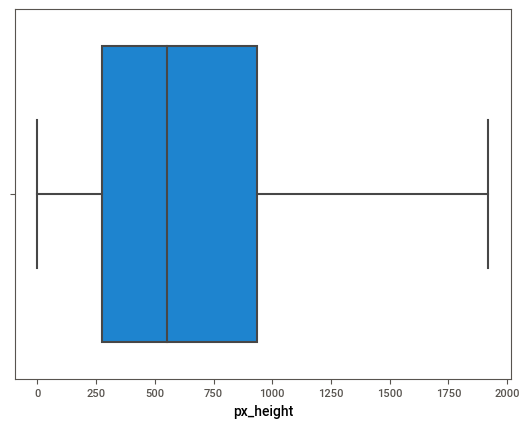

In [107]:
sns.boxplot(x='px_height',data=df)

In [108]:
pd.set_option('display.max_columns',None)
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1998 rows x 21 columns]

In [109]:
df.price_range.nunique()

4

In [110]:
columns=['battery_power','int_memory','mobile_wt','n_cores','px_height','px_width',
         'ram','sc_h','sc_w','talk_time','clock_speed']

In [111]:
#scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width',
                     'ram', 'sc_h', 'sc_w', 'talk_time', 'clock_speed']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [113]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0          0.420551     0         0.68         0   1       0    0.080645   
1          0.510276     1         0.00         1   0       1    0.822581   
2          0.280702     1         0.00         1   2       1    0.629032   
3          0.306767     1         0.80         0   0       0    0.129032   
4          0.911278     1         0.28         0  13       1    0.677419   
...             ...   ...          ...       ...  ..     ...         ...   
1995       0.396491     1         0.00         1   0       1    0.000000   
1996       0.983459     1         0.84         1   0       0    0.596774   
1997       0.956391     0         0.16         1   1       1    0.548387   
1998       0.756391     0         0.16         0   4       1    0.709677   
1999       0.254135     1         0.60         1   5       1    0.693548   

      m_dep  mobile_wt   n_cores  pc  px_height  px_width       ram    sc_h  \
0       0.6   0.939086  0.142857   2   0.010417  0.377444  0.637297  0.3750   
1       0.7   0.675127  0.285714   6   0.471354  0.994987  0.657822  0.8750   
2       0.9   0.720812  0.571429   6   0.657813  0.858647  0.650814  0.5000   
3       0.8   0.649746  0.714286   9   0.633333  0.893734  0.692365  0.8125   
4       0.6   0.700508  0.142857  14   0.629167  0.606015  0.352441  0.3125   
...     ...        ...       ...  ..        ...       ...       ...     ...   
1995    0.8   0.522843  0.714286  14   0.636458  0.945865  0.166458  0.6250   
1996    0.2   0.934010  0.428571   3   0.476562  0.983459  0.507885  0.5000   
1997    0.7   0.532995  1.000000   3   0.452083  0.816541  0.764456  0.3750   
1998    0.1   0.720812  0.571429   5   0.175000  0.334336  0.216771  0.9375   
1999    0.9   0.837563  0.714286  16   0.251563  0.376441  0.980225  1.0000   

          sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0     0.388889   0.944444        0             0     1            1  
1     0.166667   0.277778        1             1     0            2  
2     0.111111   0.388889        1             1     0            2  
3     0.444444   0.500000        1             0     0            2  
4     0.111111   0.722222        1             1     0            1  
...        ...        ...      ...           ...   ...          ...  
1995  0.222222   0.944444        1             1     0            0  
1996  0.555556   0.777778        1             1     1            2  
1997  0.055556   0.166667        1             1     0            3  
1998  0.555556   0.944444        1             1     1            0  
1999  0.222222   0.000000        1             1     1            3  

[1998 rows x 21 columns]

In [114]:
#splitting of data
x=df.drop('price_range',axis=1)
y=df[['price_range']]

In [115]:
df.price_range.value_counts()

3    511
2    496
0    496
1    495
Name: price_range, dtype: int64

#### observation 
  the dats is nearly balanced so balancing is not required
  

### Feature Selection 

In [116]:
#checking for correlation

In [117]:
df.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000 -0.102071    -0.033933 -0.147230  0.026598   
blue               -0.102071  1.000000     0.092078  0.211027 -0.007898   
clock_speed        -0.033933  0.092078     1.000000  0.070592 -0.010835   
dual_sim           -0.147230  0.211027     0.070592  1.000000 -0.042344   
fc                  0.026598 -0.007898    -0.010835 -0.042344  1.000000   
four_g             -0.096095  0.193334     0.035066  0.184052 -0.029048   
int_memory          0.030896 -0.031425    -0.021126 -0.079490 -0.021367   
m_dep              -0.137371  0.275133     0.098784  0.257807 -0.013866   
mobile_wt           0.091243 -0.155512    -0.047437 -0.152713  0.022501   
n_cores            -0.009251  0.007369    -0.016239 -0.049877 -0.000255   
pc                  0.051609 -0.054272    -0.026976 -0.063302  0.634577   
px_height           0.048798 -0.067786    -0.034158 -0.075065 -0.023811   
px_width            0.060430 -0.149949    -0.053380 -0.100576 -0.004890   
ram                 0.046900 -0.058899    -0.026440 -0.040319  0.024054   
sc_h                0.030445 -0.089397    -0.060742 -0.098368  0.005935   
sc_w               -0.000420 -0.024756    -0.015896 -0.037489 -0.000140   
talk_time           0.081347 -0.050695    -0.033227 -0.098332 -0.004320   
three_g            -0.105545  0.167345     0.036299  0.179719 -0.014871   
touch_screen       -0.119047  0.190697     0.089498  0.170789 -0.033626   
wifi               -0.118068  0.168297     0.052918  0.202667 -0.000844   
price_range         0.159864  0.068506     0.015442  0.071153  0.017514   

                 four_g  int_memory     m_dep  mobile_wt   n_cores        pc  \
battery_power -0.096095    0.030896 -0.137371   0.091243 -0.009251  0.051609   
blue           0.193334   -0.031425  0.275133  -0.155512  0.007369 -0.054272   
clock_speed    0.035066   -0.021126  0.098784  -0.047437 -0.016239 -0.026976   
dual_sim       0.184052   -0.079490  0.257807  -0.152713 -0.049877 -0.063302   
fc            -0.029048   -0.021367 -0.013866   0.022501 -0.000255  0.634577   
four_g         1.000000   -0.056066  0.268534  -0.162379 -0.055451 -0.050832   
int_memory    -0.056066    1.000000 -0.090578   0.024119 -0.016804 -0.014243   
m_dep          0.268534   -0.090578  1.000000  -0.205728 -0.043043 -0.044865   
mobile_wt     -0.162379    0.024119 -0.205728   1.000000  0.004730  0.049245   
n_cores       -0.055451   -0.016804 -0.043043   0.004730  1.000000  0.011628   
pc            -0.050832   -0.014243 -0.044865   0.049245  0.011628  1.000000   
px_height     -0.077063    0.029661 -0.067607   0.046913  0.004768 -0.010156   
px_width      -0.105719    0.029289 -0.151163   0.091224  0.041344  0.029989   
ram           -0.070155    0.060245 -0.124585   0.058879  0.019657  0.050180   
sc_h          -0.064128    0.069436 -0.151178   0.041596  0.010143  0.033387   
sc_w           0.007670    0.020970 -0.053617   0.002293  0.027766 -0.010986   
talk_time     -0.100368    0.010625 -0.075716   0.057322  0.024138  0.029880   
three_g        0.663511   -0.075626  0.273498  -0.152540 -0.041579 -0.050664   
touch_screen   0.199041   -0.090095  0.270020  -0.161591 -0.003041 -0.057439   
wifi           0.164712   -0.054939  0.251102  -0.148574 -0.037087 -0.044105   
price_range    0.068198    0.023581  0.079606  -0.073148  0.000232  0.019849   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.048798  0.060430  0.046900  0.030445 -0.000420   0.081347   
blue           -0.067786 -0.149949 -0.058899 -0.089397 -0.024756  -0.050695   
clock_speed    -0.034158 -0.053380 -0.026440 -0.060742 -0.015896  -0.033227   
dual_sim       -0.075065 -0.100576 -0.040319 -0.098368 -0.037489  -0.098332   
fc             -0.023811 -0.004890  0.024054  0.005935 -0.000140  -0.004320   
four_g         -0.077063 -0.105719 -0.070155 -0.064128  0.007670  -0.100368   
int_memory      0.029661  0.029289  0.060245  0.06

<Axes: >

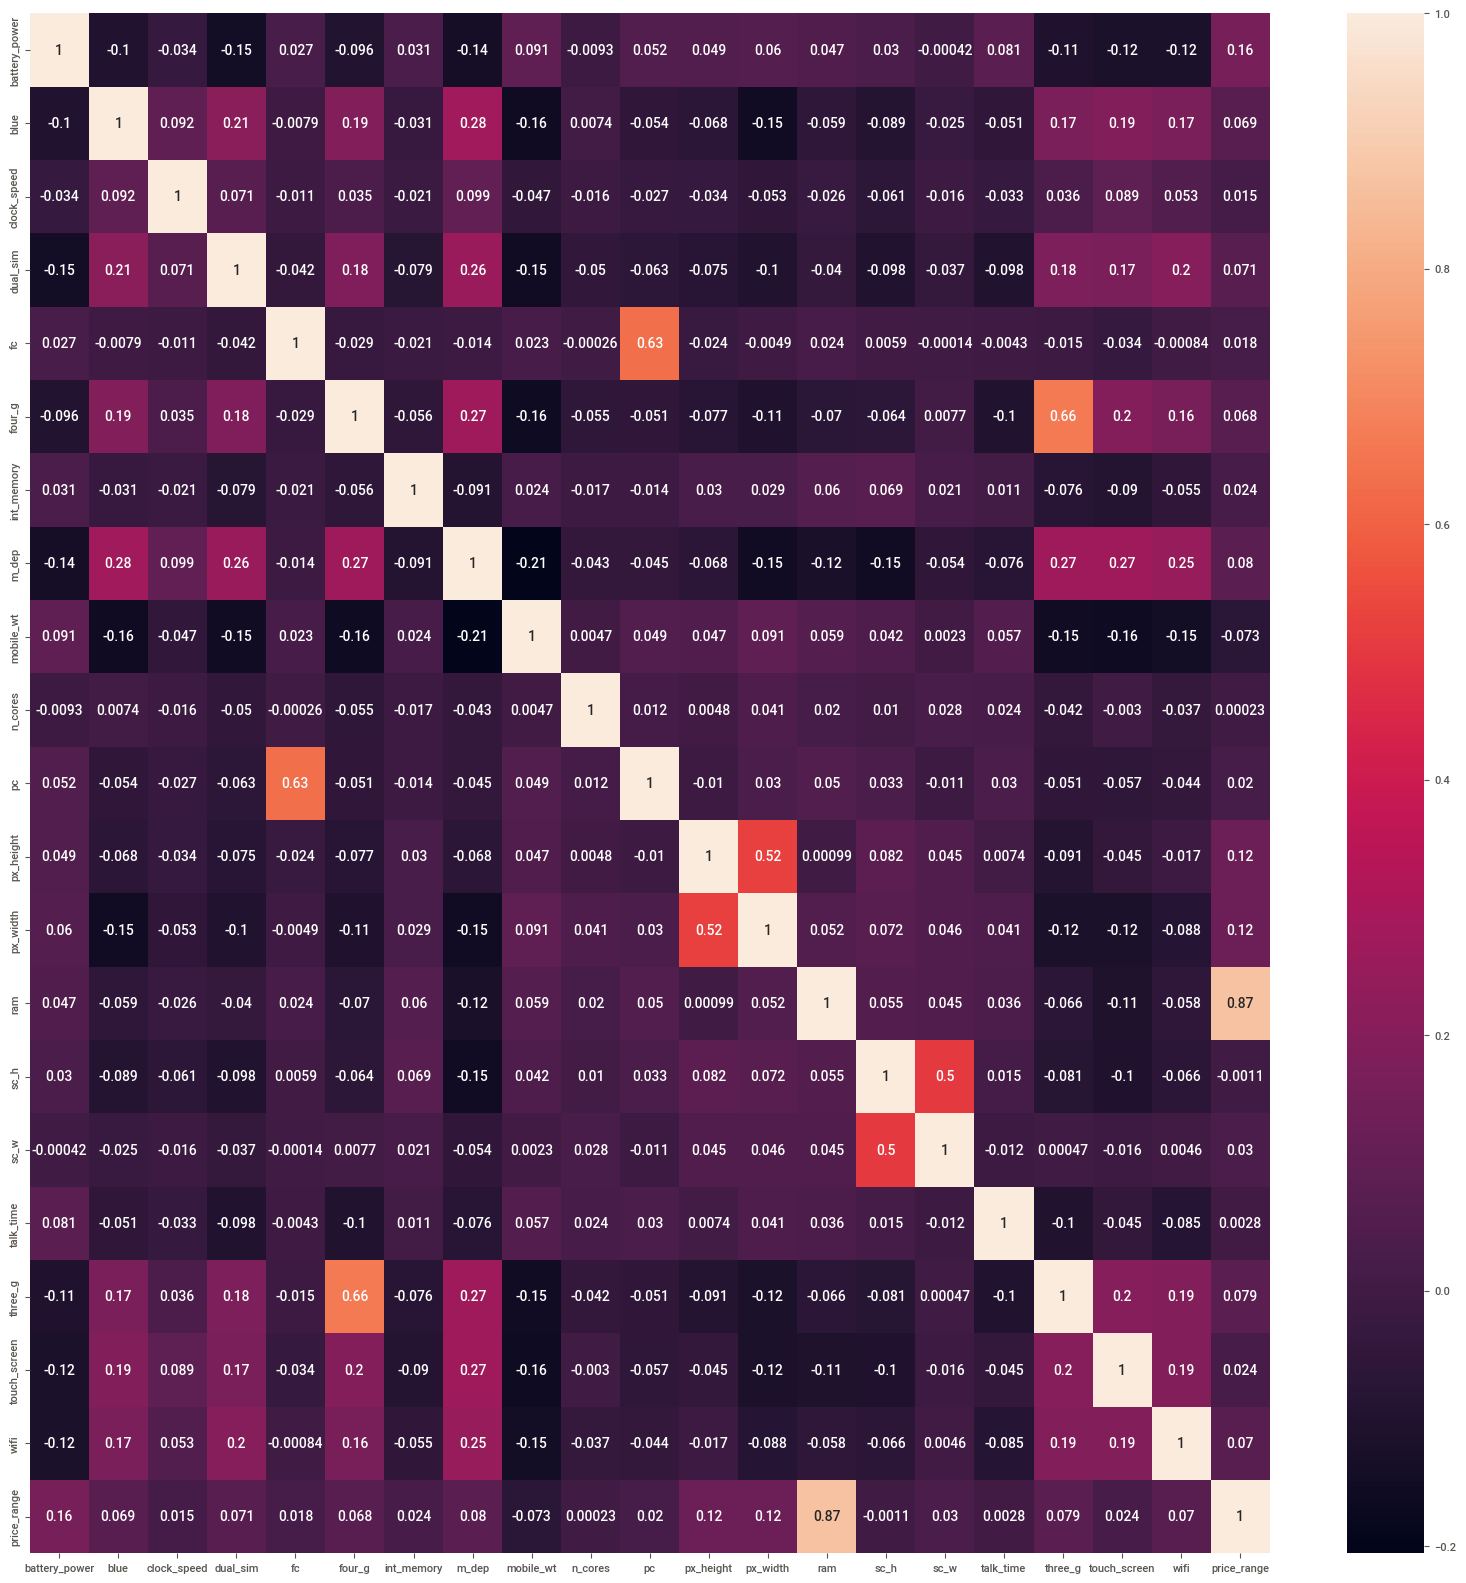

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [119]:
#training and testing data

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [121]:
x_test.shape

(400, 20)

In [122]:
x_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
875        0.706767     0         0.04         0   0       1    0.177419   
1223       0.256140     1         0.44         0   7       1    0.564516   
1728       0.532331     0         0.92         1   0       1    0.306452   
362        0.988972     1         0.08         1   4       0    0.483871   
890        0.565915     0         0.20         0   0       0    0.096774   
...             ...   ...          ...       ...  ..     ...         ...   
1923       0.527820     1         0.64         1   8       1    0.564516   
709        0.820551     1         0.08         0  10       1    0.306452   
439        0.734837     0         0.64         0   0       0    0.096774   
174        0.266165     0         0.00         1   0       1    0.225806   
1147       0.926316     1         0.56         1   3       1    0.161290   

      m_dep  mobile_wt   n_cores  pc  px_height  px_width       ram    sc_h  \
875     0.1   0.634518  0.000000   0   0.689063  0.740852  0.128160  0.1250   
1223    0.1   0.857868  0.000000   9   0.497917  0.862155  0.848310  0.5625   
1728    0.1   0.786802  0.571429   3   0.395833  0.861654  0.297872  0.8125   
362     0.8   0.852792  0.142857   7   0.677604  0.961905  0.925156  0.8750   
890     0.1   0.781726  0.000000   4   0.568229  0.646617  0.487359  0.5000   
...     ...        ...       ...  ..        ...       ...       ...     ...   
1923    0.7   0.497462  0.285714  11   0.476042  0.489223  0.662829  0.7500   
709     0.8   0.842640  0.857143  14   0.306771  0.650627  0.083605  0.8125   
439     0.7   0.609137  0.857143   0   0.207292  0.566416  0.262578  0.3125   
174     1.0   0.944162  0.571429   1   0.204687  0.599499  0.981977  0.8125   
1147    0.9   0.989848  0.714286  11   0.152604  0.984461  0.183229  0.2500   

          sc_w  talk_time  three_g  touch_screen  wifi  
875   0.000000   0.888889        1             1     0  
1223  0.444444   0.166667        1             1     1  
1728  0.722222   1.000000        1             0     1  
362   0.611111   0.611111        0             1     1  
890   0.111111   0.222222        0             1     1  
...        ...        ...      ...           ...   ...  
1923  0.277778   0.055556        1             1     1  
709   0.166667   0.166667        1             1     0  
439   0.055556   0.055556        0             1     0  
174   0.666667   1.000000        1             0     0  
1147  0.333333   0.666667        1             0     1  

[1598 rows x 20 columns]

In [123]:
y_train.shape

(1598, 1)

In [124]:
y_train

price_range
875             0
1223            3
1728            1
362             3
890             1
...           ...
1923            2
709             0
439             0
174             3
1147            0

[1598 rows x 1 columns]

### model creation 

In [125]:
#model creation using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [126]:
y_predict=lr.predict(x_test)
y_predict

array([3, 0, 1, 0, 2, 0, 3, 2, 3, 1, 3, 2, 1, 0, 1, 0, 1, 3, 2, 2, 1, 2,
       1, 2, 2, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 0,
       1, 0, 2, 3, 1, 3, 3, 1, 1, 0, 1, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 3, 2, 0, 1, 1, 2, 0, 2, 1,
       1, 3, 3, 0, 2, 2, 3, 1, 0, 1, 3, 3, 0, 1, 2, 2, 0, 2, 2, 3, 3, 0,
       0, 3, 0, 3, 0, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 3, 3, 1, 0, 2, 1, 2,
       1, 0, 3, 2, 0, 2, 1, 0, 2, 2, 3, 1, 1, 2, 3, 3, 2, 2, 1, 0, 3, 3,
       1, 0, 2, 2, 0, 1, 1, 0, 2, 3, 1, 0, 1, 2, 2, 3, 2, 0, 0, 2, 1, 1,
       3, 0, 2, 1, 3, 2, 3, 0, 0, 3, 0, 3, 2, 1, 0, 3, 0, 0, 0, 2, 0, 3,
       0, 0, 0, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 2, 0, 1, 2, 3, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 3, 2, 1, 1, 1, 0, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3,
       2, 2, 2, 1, 3, 0, 1, 3, 0, 0, 3, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 0,
       2, 0, 0, 1, 3, 0, 2, 2, 2, 2, 3, 1, 1, 2, 1, 0, 2, 1, 3, 1, 2, 1,
       2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 1, 1, 0,

In [127]:
y_test

price_range
1893            3
898             0
1415            2
559             0
88              2
...           ...
570             3
376             0
1785            1
492             2
922             0

[400 rows x 1 columns]

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [129]:
def score(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #y_pred=np.round(y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred,average=None)
    precision = precision_score(y_test, y_pred,average=None)
    f1= f1_score(y_test, y_pred,average=None)
    cr = classification_report(y_test, y_pred) 
    report=print(cr)
    return report


In [130]:
score(lr)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        98
           1       0.81      0.68      0.74       104
           2       0.70      0.68      0.69       105
           3       0.82      0.90      0.86        93

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.81      0.80       400



In [131]:
#hyperparameter tuning

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty term
    'solver': ['liblinear', 'saga']        # Optimization algorithm
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [133]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [134]:
score(grid_search)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.78      0.66      0.72       104
           2       0.66      0.68      0.67       105
           3       0.83      0.91      0.87        93

    accuracy                           0.80       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.80      0.80       400



In [135]:
#model creation using SVM 

In [136]:
from sklearn.svm import SVC
svc=SVC()

In [137]:
score(svc)

              precision    recall  f1-score   support

           0       0.54      0.86      0.66        98
           1       0.42      0.23      0.30       104
           2       0.56      0.19      0.28       105
           3       0.55      0.89      0.68        93

    accuracy                           0.53       400
   macro avg       0.52      0.54      0.48       400
weighted avg       0.52      0.53      0.47       400



In [138]:
#bagging
from sklearn.ensemble import BaggingClassifier
bag_svm=BaggingClassifier(base_estimator=svc,n_estimators=100)

In [139]:
score(bag_svm)

              precision    recall  f1-score   support

           0       0.50      0.77      0.60        98
           1       0.41      0.32      0.36       104
           2       0.51      0.37      0.43       105
           3       0.66      0.66      0.66        93

    accuracy                           0.52       400
   macro avg       0.52      0.53      0.51       400
weighted avg       0.52      0.52      0.51       400



In [140]:
#model creation using Naive Bayes 

In [141]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [142]:
score(nb)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.76      0.71      0.73       104
           2       0.61      0.82      0.70       105
           3       0.96      0.69      0.80        93

    accuracy                           0.79       400
   macro avg       0.82      0.78      0.79       400
weighted avg       0.81      0.79      0.79       400



In [143]:
#hyperparmeter tuning
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)  # Varying values for var_smoothing
}

grid_search_n = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_params
best_model

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [144]:
score(grid_search_n)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        98
           1       0.76      0.71      0.73       104
           2       0.61      0.82      0.70       105
           3       0.96      0.69      0.80        93

    accuracy                           0.79       400
   macro avg       0.82      0.78      0.79       400
weighted avg       0.81      0.79      0.79       400



In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming you have your features x and corresponding labels y

# Create a Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Specify the number of folds for cross-validation
num_folds = 5 # You can adjust this based on your preference

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(naive_bayes, x, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculate and print the mean accuracy
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:", mean_accuracy)
print("std :",mean_accuracy.std())

Accuracy scores for each fold: [0.8125     0.7775     0.7525     0.74937343 0.73934837]
Mean Accuracy: 0.7662443609022556
std : 0.0


In [146]:
#model creation using KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [148]:
score(kn)

              precision    recall  f1-score   support

           0       0.33      0.42      0.37        98
           1       0.27      0.30      0.29       104
           2       0.37      0.32      0.34       105
           3       0.48      0.37      0.41        93

    accuracy                           0.35       400
   macro avg       0.36      0.35      0.35       400
weighted avg       0.36      0.35      0.35       400



In [149]:
#hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Vary the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute neighbors
}

# Create the GridSearchCV object
grid_search_kn = GridSearchCV(estimator=kn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model to make predictions
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)



Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [150]:
score(grid_search_kn)

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        98
           1       0.33      0.32      0.32       104
           2       0.39      0.37      0.38       105
           3       0.44      0.52      0.47        93

    accuracy                           0.39       400
   macro avg       0.39      0.40      0.39       400
weighted avg       0.39      0.39      0.39       400



In [151]:
#model creation using random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=30)

In [152]:
score(rf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       0.90      0.86      0.88       104
           2       0.82      0.85      0.83       105
           3       0.90      0.90      0.90        93

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [153]:
#gradient boosting

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [155]:
score(gb)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.90      0.93      0.92       104
           2       0.86      0.87      0.86       105
           3       0.94      0.90      0.92        93

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### Conclusion 

Among the algorithms employed, the gradient boosting classifier demonstrated the highest performance with an accuracy score of 0.92. 
This suggests that the model,when trained with the provided features, is able to predict mobile prices with a high level of accuracy. 